In [1]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("pacmap"),
    verbose=True,
)

/home/james/dev/drnb-plugin/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[15:11:16] INFO     Getting dataset s1k                                              ]8;id=200681;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=758334;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=430941;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=156589;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:pacmap] launching: /home/james/.local/bin/uv run       ]8;id=708713;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=471431;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#156\156]8;;\
                    --color never --quiet drnb-plugin-run.py --method pacmap                        
                    --request /tmp/drnb-pacmap-e5a4p911/request.json                                

[15:11:19] INFO     Running PaCMAP with params={'pair_neighbors': '<ndarray          ]8;id=91046;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=130336;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    shape=(10000, 2) dtype=int32>'}                                                 

[15:11:20] INFO     Evaluating                                                       ]8;id=837805;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=309738;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=883909;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=432786;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

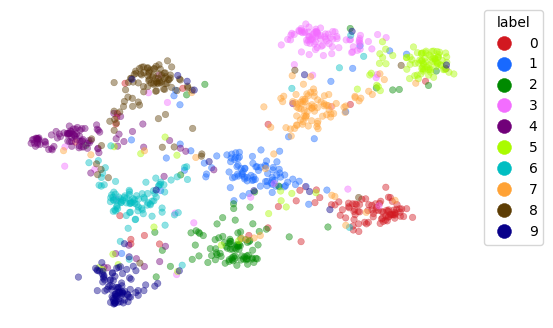

In [2]:
embed_result = embed_pipeline.run("s1k")

PaCMAP parameters from [the Python docstring](https://github.com/YingfanWang/PaCMAP/blob/master/source/pacmap/pacmap.py):

* `n_neighbors=10`
* `apply_pca=True`: whether to apply PCA on the input data. Ignored if `distance="hamming"` or 
there are fewer than 100 dimensions in the input data. Otherwise, the first 100 components from 
truncated SVD are extracted. Data is centered. If no PCA is applied then data is scaled to 0-1 
globally (columns maintain their ratio of variances) and then mean-centered.
* `MN_ratio=0.5` Ratio of mid near pairs to nearest neighbor pairs (e.g. 
`n_neighbors=10, MN_ratio=0.5` --> 5 Mid near pairs).
* `FP_ratio=2.0` Ratio of further pairs to nearest neighbor pairs (e.g. 
`n_neighbors=10, FP_ratio=2` --> 20 Further pairs).
* `pair_neighbors=None`: `numpy.ndarray` of shape `(X.shape[0] * n_neighbors, 2)`, Pre-calculated 
nearest neighbor pairs. There will be `n_neighbors` pairs per item `i`, of the form `[i, j]` where 
`j` is the index of the neighbors.
* `pair_MN=None`: `numpy.ndarray` of shape `(X.shape[0] * n_mid_near, 2)`. Pre-calculated mid near 
pairs.
* `pair_FP=None`: `numpy.ndarray` of shape `(X.shape[0] * n_further_pair, 2)`. Pre-calculated 
further pairs.
* `distance="euclidean"`: distance metric. One of: `"euclidean"`, `"manhattan"`, `"angular"`, 
`"hamming"`.
* `lr=1.0`: learning rate of the Adam optimizer.
* `num_iters=450`. Number of iterations (epochs in UMAP-speak). Internally, different weights are 
used for the different types of pairs based on the absolute value of the iteration number 
(transitions at 100 and 200 iterations), so it is recommended to set this > 250.
* `intermediate=False`: if `True`, then snapshots of the coordinates at intermediate steps of the 
iteration are also returned.
* `intermediate_snapshots=[0, 10, 30, 60, 100, 120, 140, 170, 200, 250, 300, 350, 450]`: the 
iterations at which snapshots are taken. Ignored unless `intermediate=True`. Internally, it seems
necessary to add a snapshot at the final iteration, which `drnb` will handle for you.
* `random_state=None`.
* `init`: one of `"pca"` (PCA scaled by 0.01, this is the default), `"random"` (t-SNE style) or a user-supplied matrix (which is [Z-scaled](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and then scaled by 1e-4).

### Precomputed knn: a surprise may await

**Note**: the default `apply_pca=True` will interact with the drnb `use_precomputed_knn` parameter
in potentially surprising ways. Because the precomputed knn is calculated on the full data, if 
`apply_pca=True` and the data has more than 100 dimensions, then the precomputed knn cannot be used
because the identity of the nearest neighbors in the 100D PCA-reduced space could be different from
those in the original space.

## Snapshots

An example with snapshots returned:

[15:11:21] INFO     Getting dataset s1k                                              ]8;id=466677;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=221917;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=44747;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=543765;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:pacmap] launching: /home/james/.local/bin/uv run       ]8;id=386084;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=884988;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#156\156]8;;\
                    --color never --quiet drnb-plugin-run.py --method pacmap                        
                    --request /tmp/drnb-pacmap-lpc3bu03/request.json                                

[15:11:23] INFO     Running PaCMAP with params={'intermediate': True,                ]8;id=714768;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=590749;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    'intermediate_snapshots': [0, 100, 200, 450], 'pair_neighbors':                 
                    '<ndarray shape=(10000, 2) dtype=int32>'}                                       

[15:11:24] INFO     Evaluating                                                       ]8;id=253696;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=451464;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=871977;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=919117;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

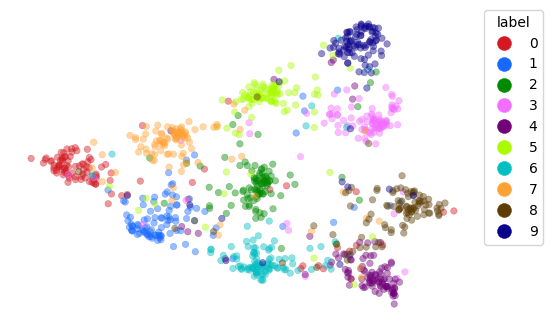

In [3]:
embed_result_with_snapshots = pl.create_pipeline(
    method=pl.embedder(
        "pacmap",
        params={
            "intermediate": True,
            "intermediate_snapshots": [0, 100, 200],
        },
        init="random",
    ),
    verbose=True,
).run("s1k")

In [4]:
embed_result_with_snapshots["snapshots"].keys()

dict_keys(['it_0', 'it_100', 'it_200', 'it_450'])

To plot the snapshots, the `plot_embedding_snapshots` function can be of use:

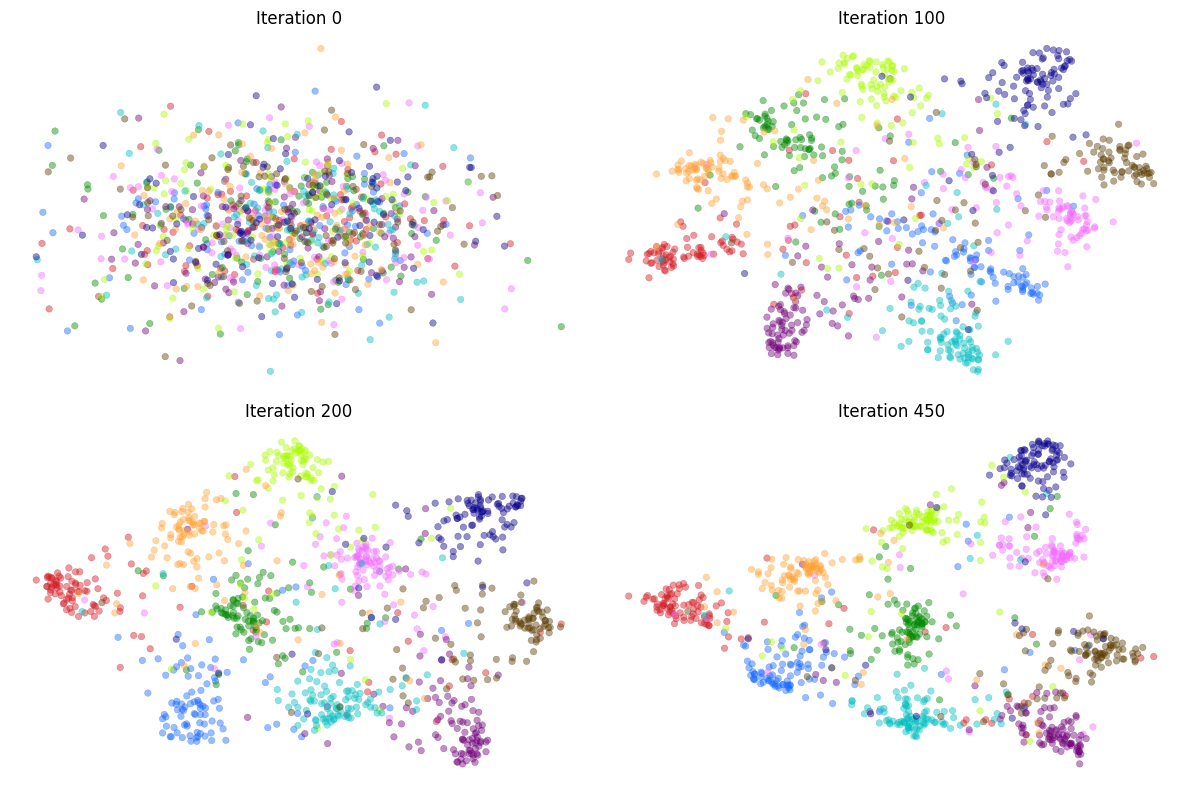

In [5]:
from drnb.plot.snapshotplot import plot_embedding_snapshots

_ = plot_embedding_snapshots(embed_result_with_snapshots, n_cols=2, figsize=(6, 4))

## Locally-scaled neighbors

Internally, PaCMAP uses locally-scaled neighbors. `drnb` uses the same approach, even with
precomputed neighbors, but with its own code. Whether this makes a huge difference to the results
is unclear. The [script demonstrating using pre-computed neighbors](https://github.com/YingfanWang/PaCMAP/blob/master/demo/specify_nn_demo.py)
at the PaCMAP repo doesn't use the extended neighborhood, so it's probably not of that much
importance. If you don't want to use the extended neighborhood, you can set `local_scale=False`
in the embedder configuration.

At any rate, here's the `mammoth` dataset, which PaCMAP does very well on, with and without local
scaling. With local scaling first:

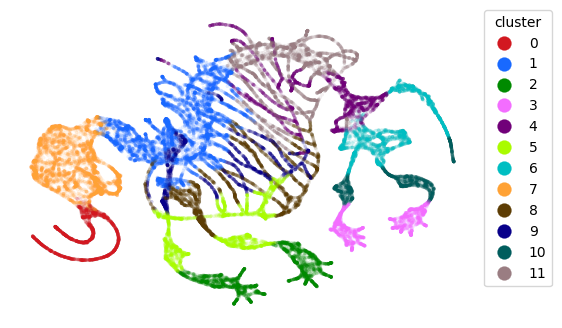

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.8523400000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.8409385), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.5813946666666667), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.5933904), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.6129374666666666), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [6]:
pl.create_pipeline(
    method=pl.embedder(
        "pacmap",
    ),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
).run("mammoth")["evaluations"]

and without:

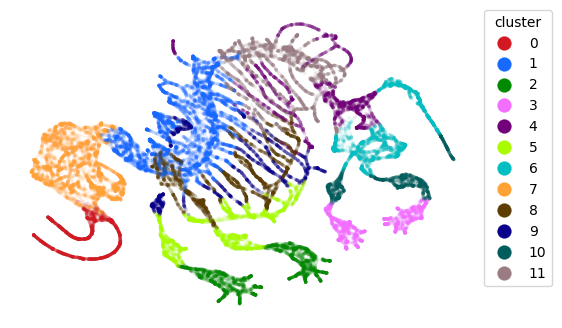

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.85308), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.8419897), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.6016746666666667), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.6059675999999999), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.6122586666666667), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [7]:
pl.standard_eval(
    pl.embedder("pacmap", local_scale=False),
    "mammoth",
)

Hard to say which of the differences we see here are due to the locally-scaled neighbors and which
are due to differences in the random number generator. The local scaling could be keeping the
overall structure more cohesive.

It's worth noting that some of the nearest neighbor evaluations will probably seem worse with
`local_scale=True`, because the local scaling means PaCMAP is less interested in keeping the
k-nearest neighbors together.

Finally, be aware that using local scaling, will require more neighbors to be available, by
default 50 more than the number of neighbors you specify. If you are using precomputed neighbors,
you will need to account for this.